In [1]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data_students_performance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df['math score'].value_counts()  > 1

math score
65     True
62     True
69     True
59     True
73     True
      ...  
24    False
26    False
19    False
23    False
8     False
Name: count, Length: 81, dtype: bool

In [5]:


print("\n\nThe features in the dataset are as follows : ")
print("1. math score : ", df['math score'].dtype)
print("2. reading score : ", df['reading score'].dtype)
print("3. writing score : ", df['writing score'].dtype)





The features in the dataset are as follows : 
1. math score :  int64
2. reading score :  int64
3. writing score :  int64


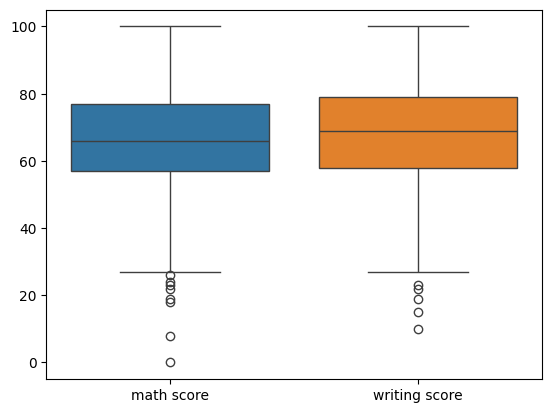

In [6]:

sns.boxplot(data=df[['math score', 'writing score']])
plt.show()


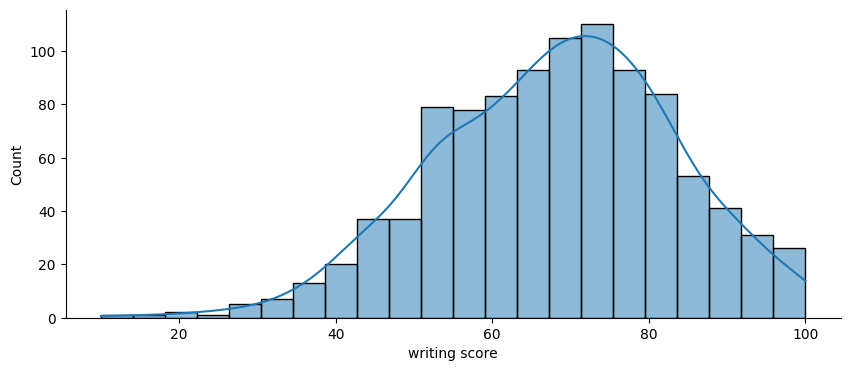

In [7]:


plt.figure(figsize=(10,4))
sns.histplot(df['writing score'], kde=True)
sns.despine()
plt.show()



In [8]:
outliers = []

def detect_outliers_zs(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [9]:
sample_outliers_math = detect_outliers_zs(df['math score'])
sample_outliers_reading = detect_outliers_zs(df['reading score'])
smaple_outliers_writing = detect_outliers_zs(df['writing score'])

print(sample_outliers_math)
print(sample_outliers_reading)
print(smaple_outliers_writing)

[18, 0, 19, 8, 17, 23, 24, 24, 10, 22, 19, 15]
[18, 0, 19, 8, 17, 23, 24, 24, 10, 22, 19, 15]
[18, 0, 19, 8, 17, 23, 24, 24, 10, 22, 19, 15]


In [10]:


outliers = []

def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data,25)
    q3 = np.percentile(data, 75)
    # print(q3, q1)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    for i in data:
        if (i < lwr_bound or i > upr_bound):
                outliers.append(i)
    return outliers



In [11]:
sample_outliers_math = detect_outliers_iqr(df['math score'])
sample_outliers_reading = detect_outliers_iqr(df['reading score'])
sample_outliers_writing = detect_outliers_iqr(df['writing score'])

print(sample_outliers_math)
print(sample_outliers_reading)
print(sample_outliers_writing)

[0, 8, 18, 19, 22, 23, 24, 26, 17, 23, 24, 24, 26, 28, 10, 15, 19, 22, 23]
[0, 8, 18, 19, 22, 23, 24, 26, 17, 23, 24, 24, 26, 28, 10, 15, 19, 22, 23]
[0, 8, 18, 19, 22, 23, 24, 26, 17, 23, 24, 24, 26, 28, 10, 15, 19, 22, 23]


In [12]:
median_math = df['math score'].median()

for i in sample_outliers_math:
    df['math score'].replace(to_replace=i, value=median_math, inplace=True)


median_write = df['writing score'].median()
for i in sample_outliers_writing:
  df['writing score'].replace(to_replace=i, value=median_write, inplace=True)


median_read = df['reading score'].median()
for i in sample_outliers_reading:
    df['reading score'].replace(to_replace=i, value=median_read, inplace=True)

/tmp/ipykernel_7224/1591512638.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['math score'].replace(to_replace=i, value=median_math, inplace=True)
/tmp/ipykernel_7224/1591512638.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

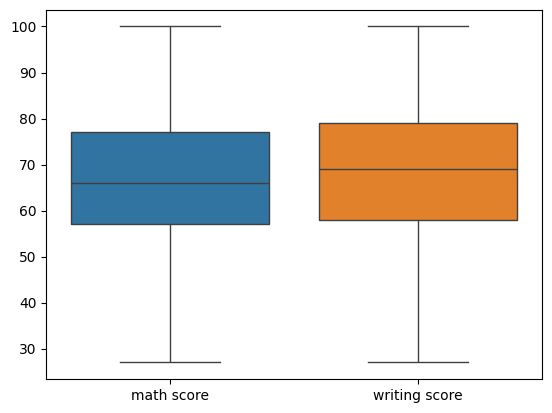

In [13]:

sns.boxplot(data=df[['math score', 'writing score']])
plt.show()


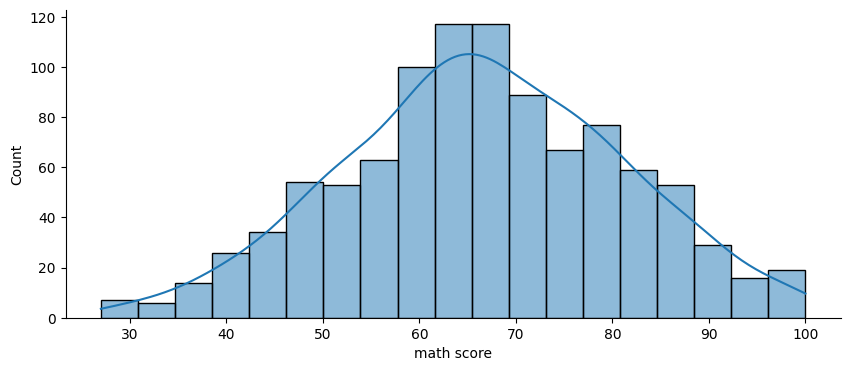

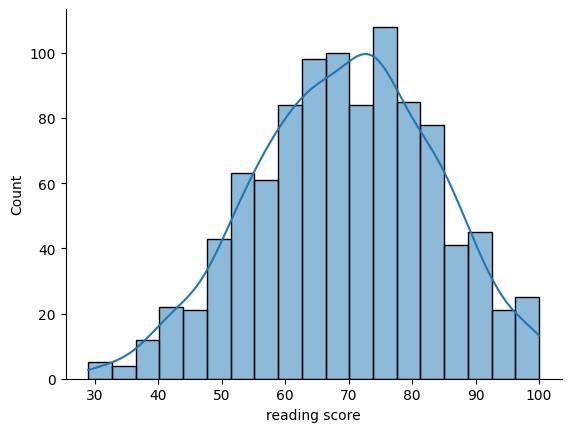

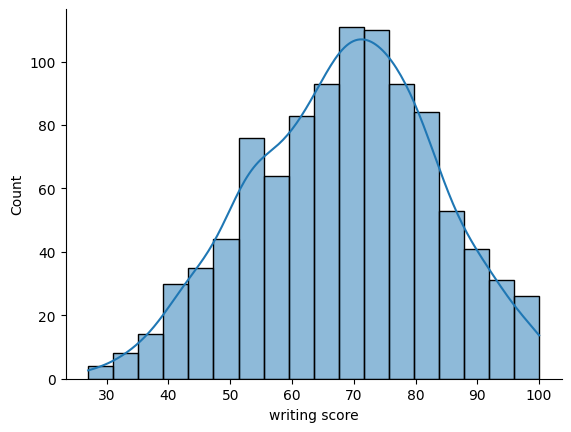

In [14]:


plt.figure(figsize=(10,4))

for i in ['math score', 'reading score', 'writing score']:
    sns.histplot(df[i], kde=True)
    sns.despine()
    plt.show()
    print("\n\n")

